In [1]:
# loading dataset from Kaggle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0=pd.read_csv("C:\Mtech-thesis\Deep learning\MNIST\mnist_train.csv")

d0.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# saving the labels in variable l

l=d0['label']

# creating dataset without labels for visualization purpose
d=d0.drop('label',axis=1)

In [3]:
print (d.shape)

(42000, 784)


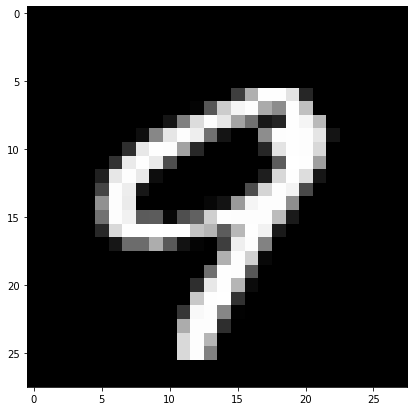

9


In [4]:
# visualizing data
plt.figure(figsize=(7,7))
idx=100 # change index value to see number

grid_data=d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

print(l[idx])

### 2D visualization using PCA

In [5]:
# picking first 15k data points to work on for time efficiency.

labels=l.head(15000)
data=d.head(15000)

print("The shape of sample data =", data.shape)

The shape of sample data = (15000, 784)


In [6]:
# Data preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [7]:
# finding covariance matrix which is A^T * A
sample_data=standardized_data

# matrix multipication using numpy
covar_matrix=np.matmul(sample_data.T , sample_data)

print ("The shape of covariance matrix =", covar_matrix.shape)

The shape of covariance matrix = (784, 784)


In [8]:
# finding the top two eigen values and corrosponding eigen vectors
# for projecting onto a 2 Dim space

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value)
# eigh function will return the eigen values in ascending order
# only top 2 (782 and 783) eigen values as output

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors =", vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness
vectors=vectors.T

print("Updated shape of eigen vectors= ", vectors.shape)

Shape of eigen vectors = (784, 2)
Updated shape of eigen vectors=  (2, 784)


In [9]:
# projecting the original data sample on the plane
# formed by two principal eigen vectors by vector-vector multiplication

import matplotlib.pyplot as plt
new_coordinates=np.matmul(vectors, sample_data.T)

print (" resultant new data points shape", vectors.shape,"X",sample_data.shape, "=", new_coordinates.shape )

 resultant new data points shape (2, 784) X (15000, 784) = (2, 15000)


In [10]:
# appending label to the 2D projected data
new_coordinates=np.vstack((new_coordinates, labels)).T

# creating a new data frame for plotting the labeled points.
dataframe=pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\garga\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


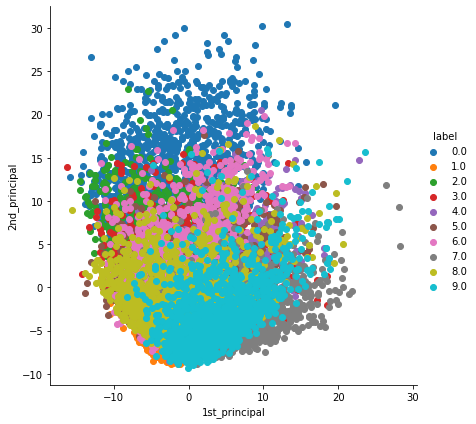

In [11]:
# plotting the 2d data points with seaborn

import seaborn as sns
sns.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()

### PCA using Scikit-Learn

In [12]:
# initializing the pca
from sklearn import decomposition
pca=decomposition.PCA()

In [13]:
#configuring the parameters
# number of component =2

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2d projects of simple data
print ("shape of pca_reduced = ", pca_data.shape)

shape of pca_reduced =  (15000, 2)


C:\Users\garga\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


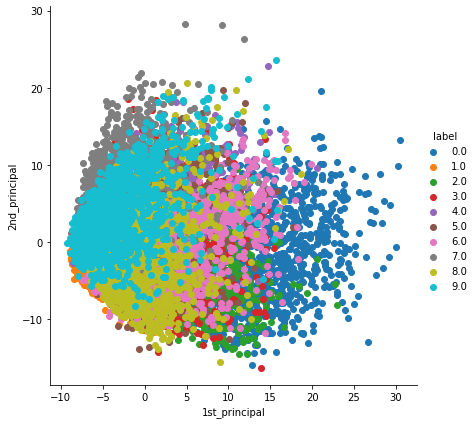

In [14]:
# attaching the label for each 2D data point
pca_data=np.vstack((pca_data.T, labels)).T

# creating a new dataframe which help us in plotting the result data
pca_df=pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()

### t-SNE using scikit-learn

C:\Users\garga\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


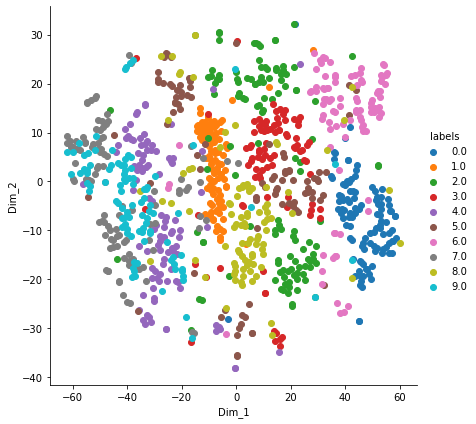

In [15]:
from sklearn.manifold import TSNE

# picking the top 1000 points 
data_1000=standardized_data[0:1000,:]
labels_1000=labels[0:1000]

model=TSNE(n_components=2, random_state=0)
# default perplexity = 30
# default learning rate = 200
# default maxumum no. of iteration for the optimization = 1000

tsne_data=model.fit_transform(data_1000)

#creating new data for plotting result
tsne_data=np.vstack((tsne_data.T, labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim_1","Dim_2","labels"))

# plotting result
sns.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.show()

C:\Users\garga\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


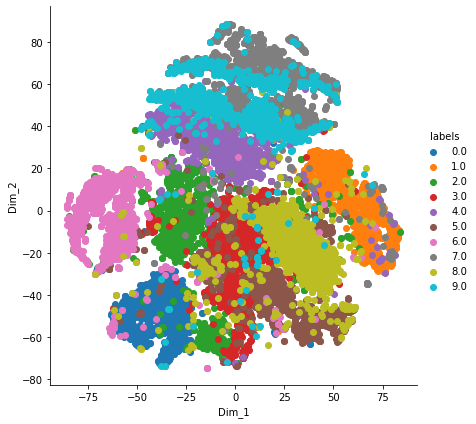

In [16]:
# picking the top 15000 points 
data_15000=standardized_data[0:15000,:]
labels_15000=labels[0:15000]

model_1=TSNE(n_components=2, random_state=0)
# default perplexity = 30
# default learning rate = 200
# default maxumum no. of iteration for the optimization = 1000

tsne_data_1=model_1.fit_transform(data_15000)

#creating new data for plotting result
tsne_data_1=np.vstack((tsne_data_1.T, labels_15000)).T
tsne_df_1=pd.DataFrame(data=tsne_data_1, columns=("Dim_1","Dim_2","labels"))

# plotting result
sns.FacetGrid(tsne_df_1, hue="labels", size=6).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.show()

C:\Users\garga\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


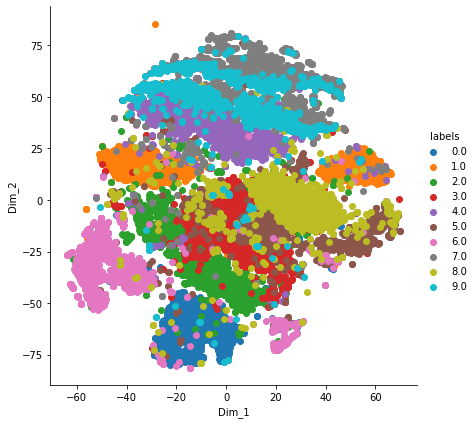

In [18]:
# picking the top 15000 points 
data_15000=standardized_data[0:15000,:]
labels_15000=labels[0:15000]

model_1=TSNE(n_components=2, random_state=0,perplexity=50)
# default perplexity = 30
# default learning rate = 200
# default maxumum no. of iteration for the optimization = 1000

tsne_data_1=model_1.fit_transform(data_15000)

#creating new data for plotting result
tsne_data_1=np.vstack((tsne_data_1.T, labels_15000)).T
tsne_df_1=pd.DataFrame(data=tsne_data_1, columns=("Dim_1","Dim_2","labels"))

# plotting result
sns.FacetGrid(tsne_df_1, hue="labels", size=6).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.title('With perplexity=50')
plt.show()

C:\Users\garga\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


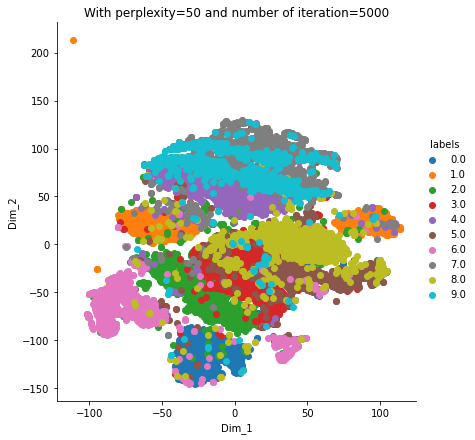

In [21]:
# picking the top 15000 points 
data_15000=standardized_data[0:15000,:]
labels_15000=labels[0:15000]

model_1=TSNE(n_components=2, random_state=0,perplexity=50, n_iter=5000)
# default perplexity = 30
# default learning rate = 200
# default maxumum no. of iteration for the optimization = 1000

tsne_data_1=model_1.fit_transform(data_15000)

#creating new data for plotting result
tsne_data_1=np.vstack((tsne_data_1.T, labels_15000)).T
tsne_df_1=pd.DataFrame(data=tsne_data_1, columns=("Dim_1","Dim_2","labels"))

# plotting result
sns.FacetGrid(tsne_df_1, hue="labels", size=6).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.title('With perplexity=50 and number of iteration=5000')
plt.show()

C:\Users\garga\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


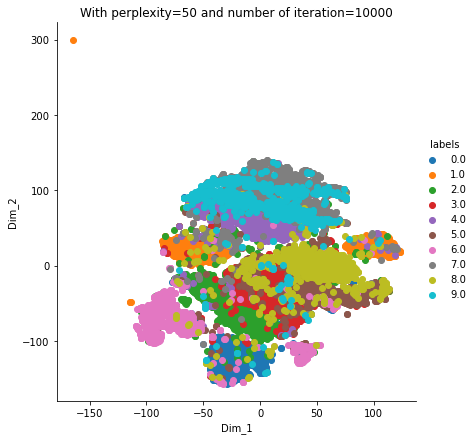

In [22]:
# picking the top 15000 points 
data_15000=standardized_data[0:15000,:]
labels_15000=labels[0:15000]

model_1=TSNE(n_components=2, random_state=0,perplexity=50, n_iter=10000)
# default perplexity = 30
# default learning rate = 200
# default maxumum no. of iteration for the optimization = 1000

tsne_data_1=model_1.fit_transform(data_15000)

#creating new data for plotting result
tsne_data_1=np.vstack((tsne_data_1.T, labels_15000)).T
tsne_df_1=pd.DataFrame(data=tsne_data_1, columns=("Dim_1","Dim_2","labels"))

# plotting result
sns.FacetGrid(tsne_df_1, hue="labels", size=6).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.title('With perplexity=50 and number of iteration=10000')
plt.show()

C:\Users\garga\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


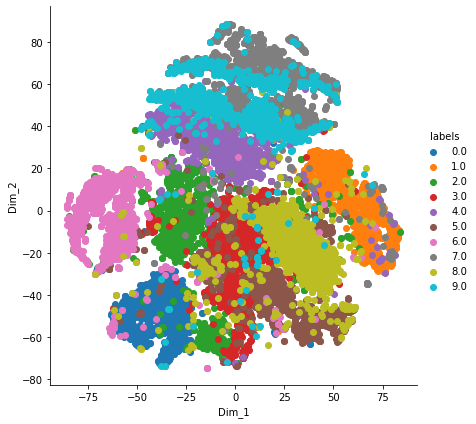

In [17]:
# picking the top 45k points 
data_45000=standardized_data
labels_45000=labels

model_2=TSNE(n_components=2, random_state=0)
# default perplexity = 30
# default learning rate = 200
# default maxumum no. of iteration for the optimization = 1000

tsne_data_2=model_2.fit_transform(data_45000)

#creating new data for plotting result
tsne_data_2=np.vstack((tsne_data_2.T, labels_45000)).T
tsne_df_2=pd.DataFrame(data=tsne_data_2, columns=("Dim_1","Dim_2","labels"))

# plotting result
sns.FacetGrid(tsne_df_2, hue="labels", size=6).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.show()